The data I am working on is the fuel efficiencies of several cars compiled by Carnegie Mellon University. The dataset is hosted by the University of California Irvine on their machine learning repository. 

In [1]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names = columns)
print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


EDA

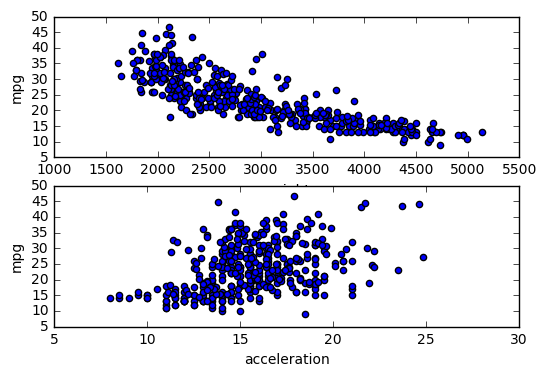

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

The scatter plots hint that there's a strong negative linear relationship between the weight and mpg columns and a weak, positive linear relationship between the acceleration and mpg columns. Let's now try to quantify the relationship between weight and mpg

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[['weight']], cars['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
predictions = lr.predict(cars[['weight']])
predictions[0:5]

array([ 19.41852276,  17.96764345,  19.94053224,  19.96356207,  19.84073631])

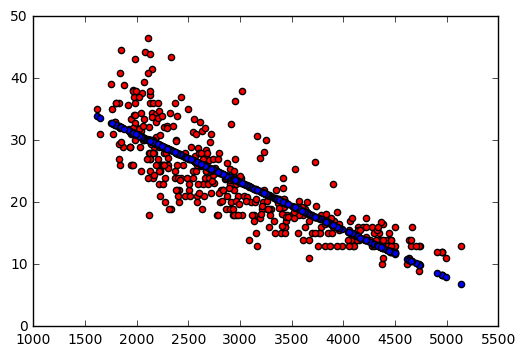

In [5]:
#Plotting the predictions
plt.scatter(cars['weight'], cars['mpg'], c='red')
plt.scatter(cars['weight'], predictions, c = 'blue')
plt.show()

In [6]:
# Error Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(cars['mpg'],predictions)
print(mse)
rmse = sqrt(mse)
print(rmse)

18.7809397346
4.33369815915


In [7]:
#There is some missing data denoted by '?' . This needs to be dealt with
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype(float)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


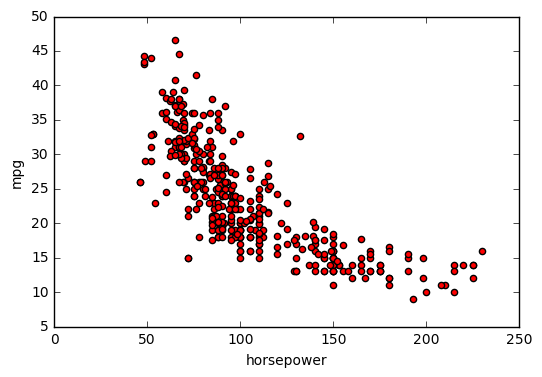

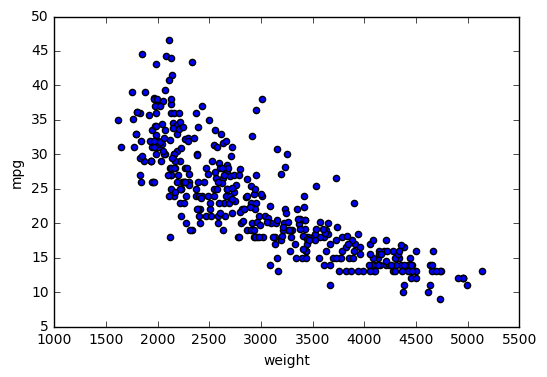

In [8]:
#EDA
filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')
plt.show()

In [9]:
#Fitting and predictions
lr.fit(filtered_cars[['horsepower']], filtered_cars['mpg'])
predictions = lr.predict(filtered_cars[['horsepower']])
print(predictions[0:5])
print(filtered_cars['mpg'].values)

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
[ 18.   15.   18.   16.   17.   15.   14.   14.   14.   15.   15.   14.
  15.   14.   24.   22.   18.   21.   27.   26.   25.   24.   25.   26.
  21.   10.   10.   11.    9.   27.   28.   25.   19.   16.   17.   19.
  18.   14.   14.   14.   14.   12.   13.   13.   18.   22.   19.   18.
  23.   28.   30.   30.   31.   35.   27.   26.   24.   25.   23.   20.
  21.   13.   14.   15.   14.   17.   11.   13.   12.   13.   19.   15.
  13.   13.   14.   18.   22.   21.   26.   22.   28.   23.   28.   27.
  13.   14.   13.   14.   15.   12.   13.   13.   14.   13.   12.   13.
  18.   16.   18.   18.   23.   26.   11.   12.   13.   12.   18.   20.
  21.   22.   18.   19.   21.   26.   15.   16.   29.   24.   20.   19.
  15.   24.   20.   11.   20.   19.   15.   31.   26.   32.   25.   16.
  16.   18.   16.   13.   14.   14.   14.   29.   26.   26.   31.   32.
  28.   24.   26.   24.   26.   31.   19.   18.   15.   15.   16.   1

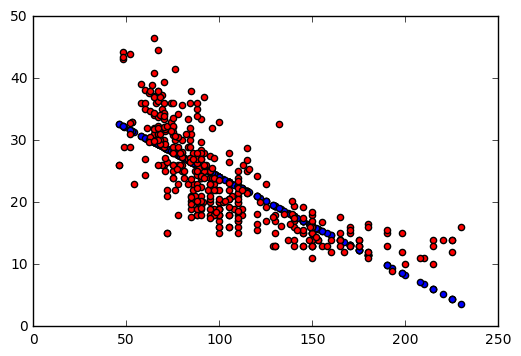

In [10]:
#Plot the predictions
plt.scatter(filtered_cars['horsepower'], predictions, c = 'blue')
plt.scatter(filtered_cars['horsepower'], filtered_cars['mpg'], c = 'red')
plt.show()

In [11]:
#Error metrics
mse = mean_squared_error(filtered_cars['mpg'], predictions)
rmse = sqrt(mse)
print(mse)
print(rmse)

23.9436629386
4.89322623007


When weight was used the mse and rmse were 18.78 and 4.33 respectively. The values when Horsepower is used are 23.94 and 4.89. Weight is a better parameter to use to predict fuel efficiency since the mse and rmse are lower. 

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance.
In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def train_and_test(cols):
      
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
  
    lr = LinearRegression()
    lr.fit(features, target)
   
    predictions = lr.predict(features)
  
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)
    
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])
    

## 4. Multivariate models ##

# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

## 5. Cross validation ##

from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n=len(filtered_cars), n_folds=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf:
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

## 6. Plotting cross-validation error vs. cross-validation variance ##

# We've hidden the `train_and_cross_val` function to save space but you can still call the function!
import matplotlib.pyplot as plt
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


While the higher order multivariate models overfit in relation to the lower order multivariate models, the in-sample error and out-of-sample didn't deviate by much. The best model was around 50% more accurate than the simplest model. On the other hand, the overall variance increased around 25% as we increased the model complexity. 